# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning
“Sumber daya manusia (SDM) adalah aset utama yang perlu dikelola dengan baik oleh perusahaan agar tujuan bisnis dapat tercapai dengan efektif dan efisien. Pada kesempatan kali ini, kita akan menghadapi sebuah permasalahan tentang sumber daya manusia yang ada di perusahaan. Fokus kita adalah untuk mengetahui bagaimana cara menjaga karyawan agar tetap bertahan di perusahaan yang ada saat ini yang dapat mengakibatkan bengkaknya biaya untuk rekrutmen karyawan serta pelatihan untuk mereka yang baru masuk. Dengan mengetahui faktor utama yang menyebabkan karyawan tidak merasa nyaman, perusahaan dapat segera menanggulanginya dengan membuat program-program yang relevan dengan permasalahan karyawan. “

Created : Jodhi Krisantus Sihalbu

gmail   : sihalbu241299@gmail.com | jodhi1911253@itpln.ac.id

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel(r"Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx")
print(df.shape)
df.head()

(287, 25)


,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
miss_value = pd.DataFrame( data = df.isna().sum(), columns={'Jumlah Miising Value'}, index=df.columns)
rati_miss_value = pd.DataFrame(data=round(df.isna().sum() / len(df) * 100,2), columns={"ratio (%)"})
pd.concat([miss_value,rati_miss_value],axis=1)

,Jumlah Miising Value,ratio (%)
Username,0,0.00
EnterpriseID,0,0.00
StatusPernikahan,0,0.00
JenisKelamin,0,0.00
StatusKepegawaian,0,0.00
Pekerjaan,0,0.00
JenjangKarir,0,0.00
PerformancePegawai,0,0.00
AsalDaerah,0,0.00
HiringPlatform,0,0.00


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [6]:
df.describe(include="object").T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


- Terdapat ``Missing value`` pada kolom (SkorKepuasanPegawai = 1.74%, JumlahKeikutsertaanProjek = 1.05%, JumlahKeterlambatanSebulanTerakhir = 0.35%, JumlahKetidakhadiran = 2.09%, `IkutProgramLOP = 89.90%`, AlasanResign = 23%)
- Data type object pada (TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan, TanggalResign), seharusnya adalah datetime
- Pada kolom `NomorHP` mempunyai value `+6282232522xxx`. Lebih baik dikateggorikan menjadi kategori provider
- Pada kolom `Email` lebih baik dikategorikan, contoh : yahoo, gmail, hotmail, dll

In [7]:
numeric = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']

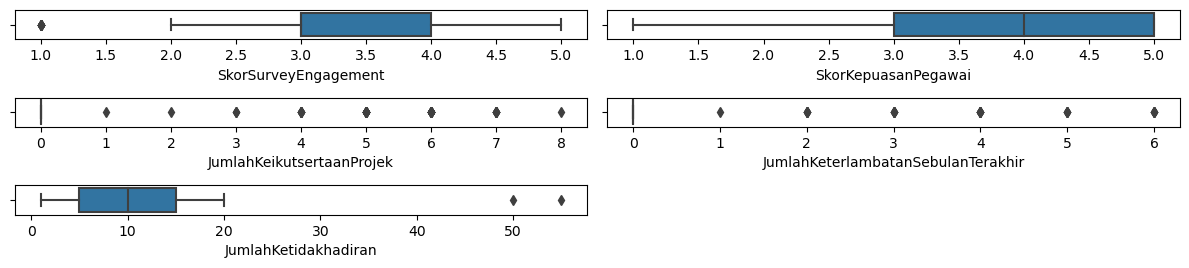

In [8]:
plt.figure(figsize=(12,12))
for i in range(len(numeric)):
    sns.color_palette(palette="BuGn")
    plt.subplot( 14,2, i+1 )
    sns.boxplot( data=df, x=df[numeric[i]] )
    plt.tight_layout()

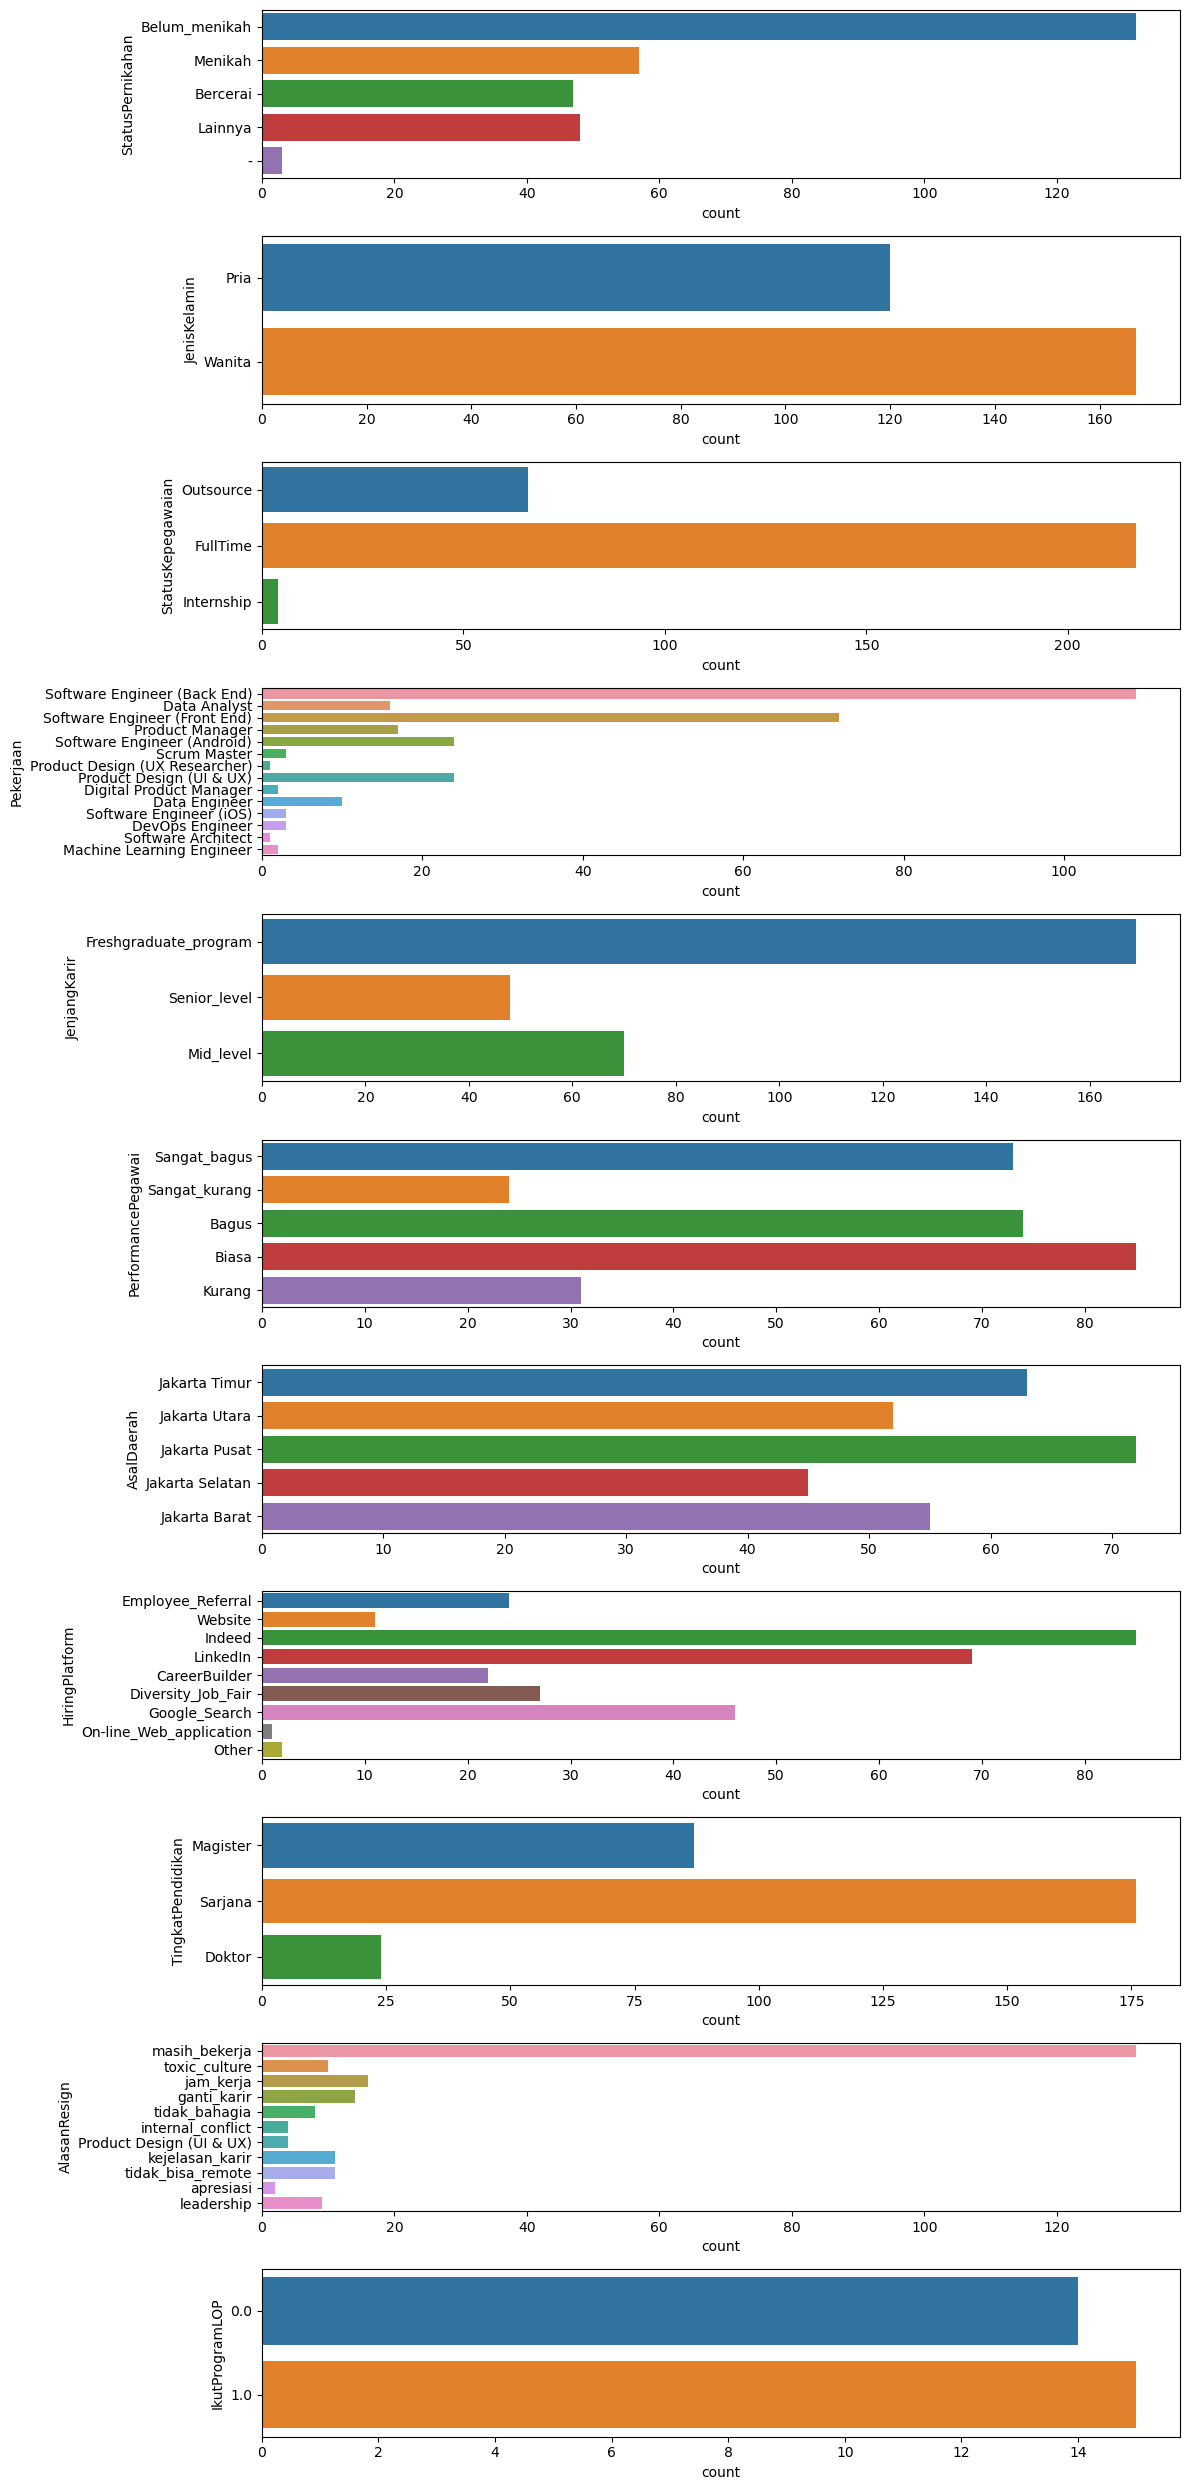

In [9]:
obj = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform',
       'TingkatPendidikan','AlasanResign','IkutProgramLOP']

plt.figure(figsize=(12,25))
for i in range(len(obj)):
    plt.subplot( 11,1, i+1 )
    sns.countplot( data=df, y=df[obj[i]] )
    plt.tight_layout()

# Preprocessing

In [10]:
df_pre = df.copy()

**Etract Resign / Not Resign**
- Resign = 1
- Not_Resign = 0

In [11]:
def resign_validation(value):
    if value != '-':
        return 1
    else:
        return 0
df_pre['is_resign']= df_pre['TanggalResign'].apply( lambda x: resign_validation(x) )
df_pre.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign
153,jealousPlover2,106294,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,+6289993369xxx,jealousPlover2299@hotmail.com,Sarjana,1,NaN,masih_bekerja,1984-07-07,2013-07-08,2020-01-02,-,0
86,sincereGatorade8,111089,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,7.0,0.0,2.0,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,1,NaN,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-3-15,1
177,solidEagle1,100762,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Bagus,Jakarta Utara,Other,4,3.0,2.0,0.0,3.0,+6283334899xxx,solidEagle1834@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-04-16,2009-01-05,2020-02-08,-,0
95,curiousBaboon5,105429,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Utara,Google_Search,3,3.0,0.0,0.0,9.0,+6281830594xxx,curiousBaboon5744@icloud.com,Sarjana,1,NaN,tidak_bisa_remote,1983-07-28,2014-9-29,2020-02-01,2020-8-19,1
224,affectedLollies9,106673,Bercerai,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Pusat,Indeed,4,4.0,0.0,0.0,1.0,+6289519764xxx,affectedLollies9935@proton.com,Sarjana,1,NaN,NaN,1965-05-09,2011-07-05,2017-03-02,-,0


## Handling Missing Value

- SkorKepuasanPegawai = 1.74 %
- JumlahKeikutsertaanProjek = 1.05% 
- JumlahKeterlambatanSebulanTerakhir = 0.35%
- JumlahKetidakhadiran = 2.09 %
- IkutProgramLOP = 89.90 %
- AlasanResign = 23.00 %

**Alsan Resign**

Semua missing value pada fitur `Alsan Resign` merupakan karyawan yang masih bekerja. Sehingga fill missing value dengan 'masih_bekerja'

In [12]:
len( df_pre[ (df_pre['AlasanResign'].isna()==True) & (df_pre['is_resign']==1) ] ) #Check apakah ada karyawan resign, yang tidak mengisi form Alasan Resign 

0

In [13]:
df_pre['AlasanResign'] = df_pre['AlasanResign'].fillna('masih_bekerja')
df_pre['AlasanResign'].isna().sum()

0

**Ikut Program LOP**

Karena jumlah missing value terlalu banyak (89%), maka kita remove feature IkutProgramLOP|

In [14]:
print(df_pre['IkutProgramLOP'].value_counts())

1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64


In [15]:
df_pre = df_pre.drop('IkutProgramLOP', axis=1)

**Drop Missing Value**

In [16]:
df_pre = df_pre.dropna(subset=['JumlahKetidakhadiran','JumlahKeterlambatanSebulanTerakhir','JumlahKeikutsertaanProjek','SkorKepuasanPegawai'])
df_pre.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
is_resign                             0


## Handling Invalid Value

Feature `PernahBekerja` memiliki unique value (1 & yes) yang memiliki kesamaan arti. Karena value pada feature tersebut memiliki arti yang sama, maka kita remove feature tersebut

In [17]:
df_pre['PernahBekerja'].value_counts()

1      274
yes      1
Name: PernahBekerja, dtype: int64

In [18]:
df_pre = df_pre.drop('PernahBekerja', axis=1)

## Handling Invalid Data Type

In [19]:
df_pre['TanggalLahir'] = pd.to_datetime( df_pre['TanggalLahir'] )
df_pre['TanggalHiring'] = pd.to_datetime( df_pre['TanggalHiring'] )
df_pre['TanggalPenilaianKaryawan'] = pd.to_datetime( df_pre['TanggalPenilaianKaryawan'] )
df_pre['TanggalResign'] = pd.to_datetime( df_pre['TanggalResign'], errors='coerce')


In [20]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            275 non-null    object        
 1   EnterpriseID                        275 non-null    int64         
 2   StatusPernikahan                    275 non-null    object        
 3   JenisKelamin                        275 non-null    object        
 4   StatusKepegawaian                   275 non-null    object        
 5   Pekerjaan                           275 non-null    object        
 6   JenjangKarir                        275 non-null    object        
 7   PerformancePegawai                  275 non-null    object        
 8   AsalDaerah                          275 non-null    object        
 9   HiringPlatform                      275 non-null    object        
 10  SkorSurveyEngagement      

In [21]:
df_pre.head(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1


## Feature Endcoding

**JenisKelamin**

In [22]:
df_pre['is_Male'] = df_pre['JenisKelamin'].replace({'Pria':1, 'Wanita':0})
df_pre[['is_Male','JenisKelamin']].sample(2, random_state=23)

,is_Male,JenisKelamin
16,1,Pria
269,0,Wanita


**Jenjang Karir**

In [23]:
def jenjangkarir_endcode(values):
    if values == 'Freshgraduate_program':
        return 0
    elif values == 'Mid_level':
        return 1
    elif values == 'Senior_level':
        return 2

df_pre['Career_level'] = df_pre['JenjangKarir'].apply(lambda x : jenjangkarir_endcode(x))

df_pre[['Career_level','JenjangKarir']].sample(3,random_state=12)

,Career_level,JenjangKarir
205,2,Senior_level
56,1,Mid_level
18,0,Freshgraduate_program


**Performance Pegawai**

In [24]:
df_pre['PerformancePegawai'].value_counts()

Biasa            79
Bagus            74
Sangat_bagus     72
Kurang           29
Sangat_kurang    21
Name: PerformancePegawai, dtype: int64

In [25]:
def PerformancePegawai_endcode(values):
    if values == 'Sangat_kurang':
        return 1
    elif values == 'Kurang':
        return 2
    elif values == 'Biasa':
        return 3
    elif values == 'Bagus':
        return 4
    elif values == 'Sangat_bagus':
        return 5

df_pre['Employee_Performance'] = df_pre['PerformancePegawai'].apply(lambda x : PerformancePegawai_endcode(x))
df_pre[['Employee_Performance','PerformancePegawai']].sample(5,random_state=22)

,Employee_Performance,PerformancePegawai
277,5,Sangat_bagus
243,3,Biasa
138,2,Kurang
203,5,Sangat_bagus
273,4,Bagus


**Tingkat Pendidikan**

In [26]:
def TingkatPendidikan_endcode(values):
    if values == 'Sarjana':
        return 1
    elif values == 'Magister':
        return 2
    elif values == 'Doktor':
        return 3

df_pre['Education_level'] = df_pre['TingkatPendidikan'].apply(lambda x : TingkatPendidikan_endcode(x))

df_pre[['Education_level','TingkatPendidikan']].sample(3,random_state=17)


,Education_level,TingkatPendidikan
234,3,Doktor
203,1,Sarjana
181,2,Magister


In [27]:
df_pre.head(2)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,is_Male,Career_level,Employee_Performance,Education_level
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0,1,0,5,2
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,1,0,1,1


# Insight 
Dalam konteks manajemen karyawan, perusahaan perlu mengetahui berapa perubahan jumlah karyawan setiap tahunnya agar bisa menyesuaikan langkah strategis guna meningkatkan kinerja perusahaan dan bisa bertahan di dunia yang terdisrupsi ini. Salah satu langkah yang telah dibuat perusahaan adalah melakukan perubahan budaya kerja setiap tahunnya yang mengacu pada jumlah karyawan yang ada, semakin banyak karyawan maka office space yang perlu disiapkan juga semakin bertambah, serta kebijakan-kebijakan lain seperti besaran bonus maksimal untuk karyawan yang performanya baik di tahun tersebut dan lain-lain. Setiap tahunnya perusahaan menyadari ada yang keluar dan ada yang masuk (karyawan), namun apabila pada tahun tertentu jumlah karyawan yang keluar lebih banyak dari yang masuk artinya perusahaan perlu berbenah diri agar karyawan lain tetap bertahan sehingga rancangan strategi jangka panjang tetap dapat dilaksanakan tanpa kendala.

1. Buatlah dua tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign (Hint: Convert tahun hiring dan resign dari fitur TanggalHiring dan TanggalResign) 
2. Join dua tabel tersebut berdasarkan tahun resign dan hiring agar menjadi satu tabel utuh (Hint: Gunakan outer join agar tahun di hiring dan resign dapat bersatu) 
3. Lakukan imputation pada data tahun yang kosong sesuai urutan (Hint: Gunakan fillna) 
4. Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya dari table hasil join pada tahap dua (2) (Hint: Untuk perubahan, hitung dari total karyawan yang ada - total karyawan yang resign di setiap tahunnya) 
5. Buatlah plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada (Hint: Perhatikan jenis plot yang digunakan) 
6. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Jelaskan kondisi perusahaan apakah sedang sehat / mengkhawatirkan berdasarkan jumlah karyawan tahunan)

In [28]:
df_pre.head(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,is_Male,Career_level,Employee_Performance,Education_level
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0,1,0,5,2
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,1,0,1,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,1,0,4,2


In [29]:
Total_hiring = df_pre.groupby(df_pre['TanggalHiring'].dt.year)[['Username']].count().reset_index()
Total_resign = df_pre.groupby(df_pre['TanggalResign'].dt.year)[['Username']].count().reset_index()
Total_hiring.columns=['Tahun','Jumlah_hiring']
Total_resign.columns=['Tahun','Jumlah_resign']

In [30]:
employee_activities = Total_hiring.merge(Total_resign, how='outer')
employee_activities.fillna(0,inplace=True)
employee_activities

,Tahun,Jumlah_hiring,Jumlah_resign
0,2006.0,1.0,0.0
1,2007.0,2.0,0.0
2,2008.0,2.0,0.0
3,2009.0,7.0,0.0
4,2010.0,8.0,0.0
5,2011.0,74.0,0.0
6,2012.0,38.0,0.0
7,2013.0,43.0,5.0
8,2014.0,55.0,12.0
9,2015.0,26.0,8.0


Text(0.5, 1.0, 'Anual Report on Employee Number')

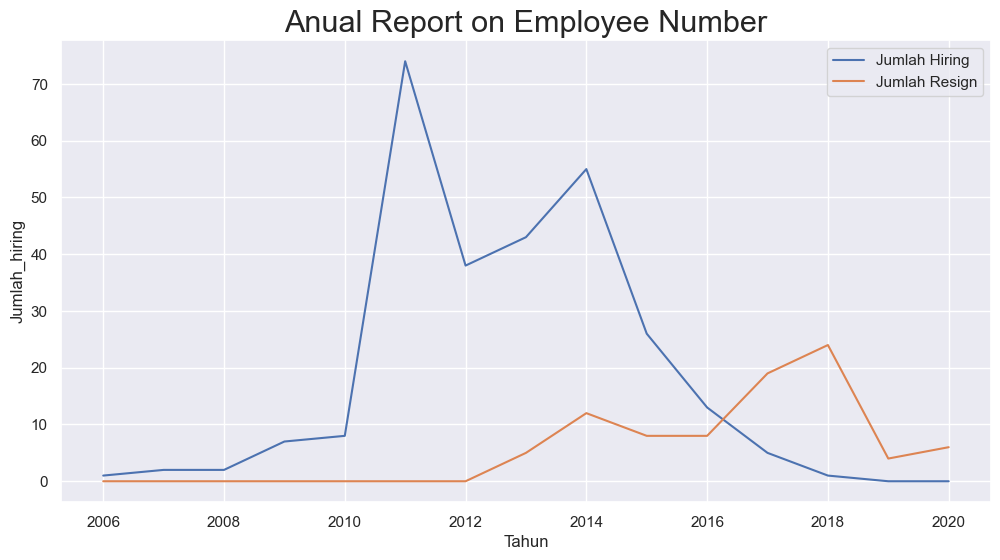

In [31]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(data=employee_activities, y='Jumlah_hiring', x='Tahun', label ='Jumlah Hiring')
sns.lineplot(data=employee_activities, y='Jumlah_resign', x='Tahun',  label ='Jumlah Resign')
plt.title('Anual Report on Employee Number', fontsize=22)

In [32]:
import plotly.graph_objects as go

In [33]:
hiring = [ employee_activities['Jumlah_hiring'][i] - employee_activities['Jumlah_hiring'][i-1] for i in range(1,len(employee_activities['Jumlah_hiring'])) ]
hiring = [1] + hiring

go.Figure(go.Waterfall(
    name = "Movie", orientation = "v", 
    x =employee_activities['Tahun'] ,
    textposition = "auto",
    text = employee_activities['Jumlah_hiring'],
    y = hiring,
    connector = {"line":{"color":"#b20710"}},
    increasing = {"marker":{"color":"#b20710"}},
    decreasing = {"marker":{"color":"orange"}},
))


In [34]:

resign = [ employee_activities['Jumlah_resign'][i] - employee_activities['Jumlah_resign'][i-1] for i in range(1,len(employee_activities['Jumlah_resign'])) ]
resign = [1] + resign

go.Figure(go.Waterfall(
    name = "Movie", orientation = "v", 
    x =employee_activities['Tahun'] ,
    textposition = "auto",
    text = employee_activities['Jumlah_resign'],
    y = resign,
    connector = {"line":{"color":"#b20710"}},
    increasing = {"marker":{"color":"#b20710"}},
    decreasing = {"marker":{"color":"orange"}},
))

Setelah mengetahui keadaan dari perusahaan yang sedang tidak baik-baik saja, langkah selanjutnya adalah mengetahui alasan pegawai untuk resign pada setiap divisi pekerjaan yang ada. Perusahaan ingin membuat strategi yang lebih personal sehingga setiap divisi pekerjaan yang ada diberikan perlakuan yang sesuai dengan keluhannya masing-masing. Hanya saja, perusahaan ingin mengetahui divisi apa yang paling rentan resign, kemudian langkah apa yang sekiranya bisa dilakukan oleh perusahaan. Pada tahap ini kamu akan menyelidiki bagaimana persebaran tipe pekerjaan yang paling sering resign beserta alasan mereka yang bisa dijadikan kunci dalam perbaikan management pada setiap divisi pekerjaan yang ada.

1. Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign (Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum) 
2. Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan (Hint: Gunakan outer join) 
3. Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign) (Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee) 
4. Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya (Hint: Perhatikan jenis plot yang digunakan) 
5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign (Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat) 
6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya (Hint: Perhatikan jenis plot yang digunakan) 
7. Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan manajemen agar tidak terjadi lagi hal yang seperti itu)

In [37]:
df_pre.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,is_resign,is_Male,Career_level,Employee_Performance,Education_level
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,0,1,0,5,2
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,1,1,0,1,1
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,1,1,0,4,2
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,0,1,0,4,1
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,1,0,0,4,1


In [81]:
df_work_resign = df_pre.groupby(['Pekerjaan','is_resign'])[['Username']].count()
df_work_resign.reset_index(inplace=True)


df_work_resign = pd.pivot_table(data=df_work_resign,
               columns = 'is_resign',
               values = 'Username',
               index='Pekerjaan'
               )
df_work_resign = df_work_resign.fillna(0)
df_work_resign.columns = ['0','1']
df_work_resign.reset_index(inplace=True)

In [84]:
df_work_resign['resign_ratio'] = round (df_work_resign['1'] / (df_work_resign['0'] + df_work_resign['1']) * 100,2)
df_work_resign

,Pekerjaan,0,1,resign_ratio
0,Data Analyst,7.0,8.0,53.33
1,Data Engineer,7.0,3.0,30.00
2,DevOps Engineer,3.0,0.0,0.00
3,Digital Product Manager,2.0,0.0,0.00
4,Machine Learning Engineer,2.0,0.0,0.00
5,Product Design (UI & UX),14.0,8.0,36.36
6,Product Design (UX Researcher),1.0,0.0,0.00
7,Product Manager,11.0,5.0,31.25
8,Scrum Master,2.0,0.0,0.00
9,Software Architect,1.0,0.0,0.00


Text(0.5, 1.0, 'PERCENTAGE OF RESIGNATIONS BY OCCUPATION')

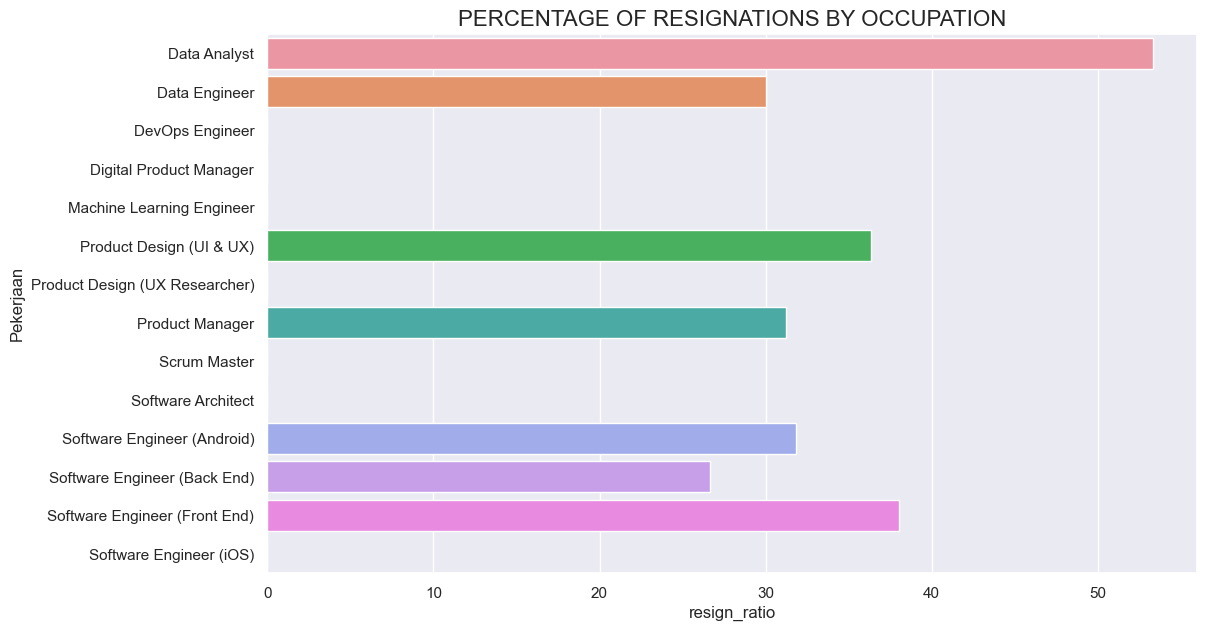

In [95]:
plt.figure(figsize=(12,7))
sns.barplot( data=df_work_resign, y='Pekerjaan', x='resign_ratio')
plt.title('PERCENTAGE OF RESIGNATIONS BY OCCUPATION', fontsize = 16)